## Feature Scaling

In [31]:
import numpy as np 
import pandas as pd 
import os 
import sys 
import seaborn as sns 
import matplotlib.pyplot as plt 
sys.path.append(os.path.join(".."))

## Data Loading

In [7]:
# Import functionalities for data loading
from scripts.collection.ingestor import FileIngestor

In [11]:
# Load the dataset
ingestor = FileIngestor(folder="training", filename="laptop_price_dataset.csv")
dataset = ingestor.ingest()
dataset

,BRAND,PRICE,GPU,OPERATING_SYSTEM,TOUCHSCREEN,BLUETOOTH,HARD_DRIVE,SSD_CAPACITY,DISPLAY,WEBCAM(BUILT-IN),COLOR
0,other,303.80,intel,windows,NO,NO,512,1,NO,YES,gray
1,dell,175.00,intel,windows,NO,YES,500,500,YES,YES,black
2,hp,85.00,intel,chrome,YES,YES,16,240,YES,YES,black
3,dell,101.25,other,windows,NO,YES,256,256,YES,YES,other
4,acer,50.00,other,chrome,NO,NO,256,16,NO,YES,black
...,...,...,...,...,...,...,...,...,...,...,...
4177,other,162.20,other,unknown,NO,NO,256,240,NO,NO,other
4178,acer,93.25,other,unknown,NO,NO,256,240,NO,NO,other
4179,dell,424.80,intel,windows,NO,NO,256,120,NO,NO,black
4180,hp,90.94,other,unknown,YES,YES,256,240,NO,YES,other


## Data Preparation

In [10]:
# Import functionalities 
from scripts.processing.transformer import ColumnTransformer
from scripts.features.feature_selector import FeatureSelector

In [16]:
# Instantiate object 
column_transformer = ColumnTransformer()
selector = FeatureSelector(dataset)
selector.dataset

# Select only numerical data
numerical_features = ["HARD_DRIVE", "SSD_CAPACITY", "PRICE"] 
dataset1 = selector.select(numerical_features)

Number of features selected: 3


<Axes: xlabel='SSD_CAPACITY', ylabel='PRICE'>

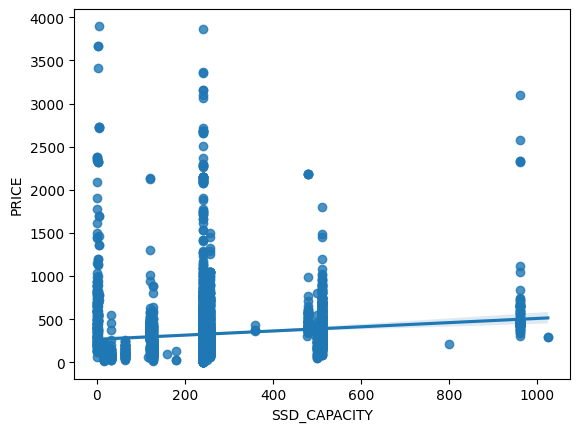

In [26]:
# Visualise harddrive and ssd capacity with price through regression plot 
# sns.regplot(data=dataset1, x="HARD_DRIVE", y="PRICE")
sns.regplot(data=dataset1, x="SSD_CAPACITY", y="PRICE")

## Feature Scaling

In [17]:
# Import functionalities 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [29]:
# Prepare the input data 
hardrive = dataset1[["HARD_DRIVE"]].values
ssd_capacity = dataset1[["SSD_CAPACITY"]].values
# Apply standard scalar
scaler = StandardScaler()

dataset1["HARD_DRIVE"] = scaler.fit_transform(hardrive)
dataset1["SSD_CAPACITY"] = scaler.fit_transform(ssd_capacity)
dataset1["PRICE"] = scaler.fit_transform(dataset1[["PRICE"]].values)

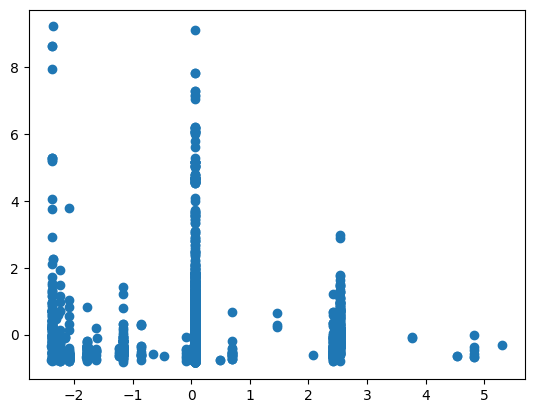

In [ ]:
# sns.regplot(data=dataset1, x="HARD_DRIVE", y="PRICE")
plt.scatter(dataset1["HARD_DRIVE"].values, dataset1["PRICE"].values)